In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:

def extract_data_from_npz(npz_path):
    # This function opens an npz file and extracts two pieces of information.
    # You need to replace 'key1' and 'key2' with the actual keys you're interested in.
    with np.load(npz_path) as data:
        info1 = data['poisson']
        info2 = data['perturbation']

    return info1, info2

def find_and_extract_npz(root_path):
    # Initialize lists to store the extracted information
    info1_list = []
    info2_list = []

    
    for root, dirs, files in os.walk(root_path):
        for file in files:
            if file.endswith('.npz'):
                npz_path = os.path.join(root, file)
                info1, info2 = extract_data_from_npz(npz_path)
                
                # Append the extracted information to the lists
                info1_list.append(info1)
                info2_list.append(info2)

                
    # At this point, info1_list and info2_list contain all the extracted information
    # You can return them, save them, or process them further as needed
    return info1_list, info2_list, info3_list

# Replace 'your/root/directory/path' with the path to the directory you want to start from
root_path = './'
info1_list, info2_list = find_and_extract_npz(root_path)

# Concatenate the lists so each of the first entries becomes different columns
for info1, info2, info3 in zip(info1_list, info2_list):
    print(f"{info1}, {info2}")



NameError: name 'info3_list' is not defined

In [8]:
import os
import numpy as np
perturbation_list = [0.1, 0.2, 0.5, 0.8, 1.0, 1.3, 1.5, 1.8, 2.0, 2.3, 2.5]

results = []
for perturbation in perturbation_list:
    folder_path = str(perturbation)
    file_list = os.listdir(folder_path)
    
    for file_name in file_list:
        if file_name.endswith('.npz'):
            file = np.load(os.path.join(folder_path, file_name))
            if file['poisson'] > -99:
                results.append([perturbation, file['poisson'], file['exit_flag']])
        
results = np.array(results)
print(results)

[[ 0.1        -0.33334785  1.        ]
 [ 0.1        -0.24984872  1.        ]
 [ 0.1        -0.44810929  0.        ]
 [ 0.1        -0.25938023  1.        ]
 [ 0.1        -0.70744151  1.        ]
 [ 0.1        -0.2964202   1.        ]
 [ 0.1        -0.33660083  1.        ]
 [ 0.1        -0.2913655   1.        ]
 [ 0.1        -0.32137229  1.        ]
 [ 0.1        -0.34526273  1.        ]
 [ 0.1        -0.28489664  1.        ]
 [ 0.1        -0.12576703  1.        ]
 [ 0.1        -0.34723483  1.        ]
 [ 0.1        -0.41235185  1.        ]
 [ 0.1        -0.16665412  1.        ]
 [ 0.1        -0.27820559  1.        ]
 [ 0.1        -0.28940696  1.        ]
 [ 0.1        -0.30451421  1.        ]
 [ 0.1        -0.37003596  1.        ]
 [ 0.1        -0.36644058  1.        ]
 [ 0.1        -0.31413566  1.        ]
 [ 0.1        -0.28505107  1.        ]
 [ 0.1        -0.18960042  1.        ]
 [ 0.1        -0.54838708  0.        ]
 [ 0.1        -0.3881242   1.        ]
 [ 0.2        -0.29315984

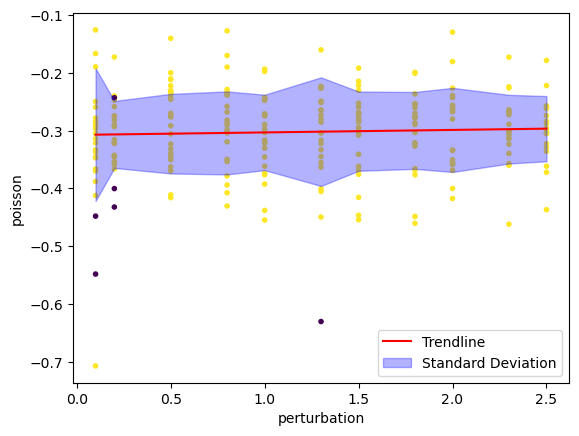

In [9]:
# Fit a polynomial of degree 1 to the data
coefficients = np.polyfit(results[:, 0], results[:, 1], 1)
unique_values = np.unique(results[:, 0])
x_values = unique_values
trendline = np.polyval(coefficients, x_values)

# Calculate the standard deviation
unique_values = np.unique(results[:, 0])

std_list = []
for value in unique_values:
    indices = np.where(results[:, 0] == value)
    std = np.std(results[:, 1][indices])
    std_list.append(std)

std_list

# Plot the scatter plot with trendline and filled area
plt.scatter(results[:, 0], results[:, 1], c=results[:, 2], marker='.')
plt.plot(x_values, trendline, color='red', label='Trendline')
plt.fill_between(x_values, trendline - std_list, trendline + std_list, color='blue', alpha=0.3, label='Standard Deviation')
plt.xlabel('perturbation')
plt.ylabel('poisson')
plt.legend()
plt.savefig('results.jpg')
plt.show()

In [37]:
coefficients

array([ 0.00998487, -0.5085875 ])

/home/bylehn/ipykernel_703598/4294557544.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')


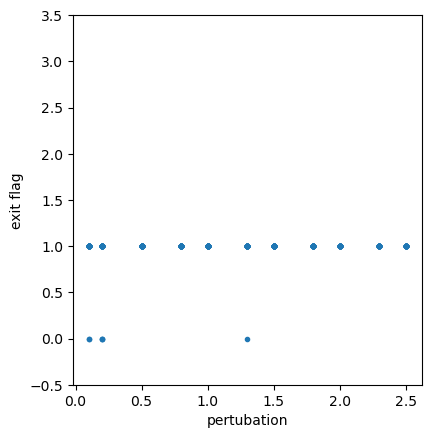

In [10]:
plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')
plt.ylim(-0.5 , 3.5)
plt.xlabel('pertubation')
plt.ylabel('exit flag')
plt.gca().set_aspect(0.7, adjustable='box')

plt.savefig('exit flags.jpg')
plt.show()